In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import pymongo
import pprint
from pymongo import MongoClient
import datetime as dt
import networkx as nx
%matplotlib inline

In [2]:
client = MongoClient('mongodb://localhost:27017')
db = client.yelp
con_check = str(db)
if con_check.find('yelp') != int(-1):
    print('...Connected')
else:
    print('...Connection Failed')

...Connected


In [3]:
user_data = list(db.user.find({},{"user_id":1, "friends":1}).limit(2000))
user_df = pd.DataFrame(user_data)
user_df.tail()

,_id,friends,user_id
1995,57712ea47b99e7221597f6b2,[Q5qn0BUEsAHoidP6wUzuSw],ks6QT1LRd8ss882LY57Bbw
1996,57712ea47b99e7221597f6b3,[],fUTViyfaLY-0uukrdggsNw
1997,57712ea47b99e7221597f6b4,[ZXyIPrKvOppfERy7nlY2ug],zRRas7ZgSJqwYbe6t6hRbw
1998,57712ea47b99e7221597f6b5,[],u8eIIj__XiQYuZkOZVF9vw
1999,57712ea47b99e7221597f6b6,[WcubmTxWMjVsr_5-MwnZPQ],YO5MkSRDJ8OgrxnpKrPKKg


In [4]:

pairs = []
index = 0
for user in user_df.user_id:
    for friend in user_df.friends[index]:
        pairs.append((friend, user))
    index = index + 1
pairs[-10:]


[('YYLkYRrfg3OxpU8mJwdwUQ', 'WFaYcQIOHOE9SW1POaRNMQ'),
 ('rmjSpAigemq4hzEC_nNW5w', 'WFaYcQIOHOE9SW1POaRNMQ'),
 ('wI8j9jI0TfoLkVECtxIrkA', 'WFaYcQIOHOE9SW1POaRNMQ'),
 ('9vLdQdd5g9f15lADBGFa4w', 'WFaYcQIOHOE9SW1POaRNMQ'),
 ('MoTi7zkhhpcqhessDE9uyA', 'C0ZKRO-U2XB7NP3e4TAfGw'),
 ('RUXkqytq9ZoTMPrAH8N9xg', 'C0ZKRO-U2XB7NP3e4TAfGw'),
 ('KNX5xfwn0mVnI7oFVKqaxg', 'C0ZKRO-U2XB7NP3e4TAfGw'),
 ('Q5qn0BUEsAHoidP6wUzuSw', 'ks6QT1LRd8ss882LY57Bbw'),
 ('ZXyIPrKvOppfERy7nlY2ug', 'zRRas7ZgSJqwYbe6t6hRbw'),
 ('WcubmTxWMjVsr_5-MwnZPQ', 'YO5MkSRDJ8OgrxnpKrPKKg')]

In [7]:
users_network = nx.Graph()
users_network.add_edges_from(pairs)
len(users_network)

12509

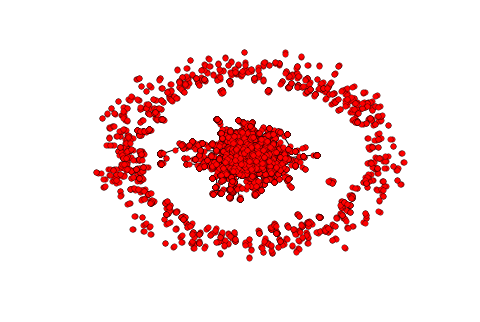

In [76]:
nx.draw(users_network, pos=nx.spring_layout(users_network),node_size=30, width=1)

In [12]:
user_data = list(db.user.find({},{"user_id":1, "friends":1}).limit(2000))
user_df = pd.DataFrame(user_data)
user_df.tail()

,_id,friends,user_id
1995,57712ea47b99e7221597f6b2,[Q5qn0BUEsAHoidP6wUzuSw],ks6QT1LRd8ss882LY57Bbw
1996,57712ea47b99e7221597f6b3,[],fUTViyfaLY-0uukrdggsNw
1997,57712ea47b99e7221597f6b4,[ZXyIPrKvOppfERy7nlY2ug],zRRas7ZgSJqwYbe6t6hRbw
1998,57712ea47b99e7221597f6b5,[],u8eIIj__XiQYuZkOZVF9vw
1999,57712ea47b99e7221597f6b6,[WcubmTxWMjVsr_5-MwnZPQ],YO5MkSRDJ8OgrxnpKrPKKg


In [13]:
pairs = []
index = 0
for user in user_df.user_id:
    for friend in user_df.friends[index]:
        pairs.append((friend, user))
    index = index + 1
pairs[-10:]

[('YYLkYRrfg3OxpU8mJwdwUQ', 'WFaYcQIOHOE9SW1POaRNMQ'),
 ('rmjSpAigemq4hzEC_nNW5w', 'WFaYcQIOHOE9SW1POaRNMQ'),
 ('wI8j9jI0TfoLkVECtxIrkA', 'WFaYcQIOHOE9SW1POaRNMQ'),
 ('9vLdQdd5g9f15lADBGFa4w', 'WFaYcQIOHOE9SW1POaRNMQ'),
 ('MoTi7zkhhpcqhessDE9uyA', 'C0ZKRO-U2XB7NP3e4TAfGw'),
 ('RUXkqytq9ZoTMPrAH8N9xg', 'C0ZKRO-U2XB7NP3e4TAfGw'),
 ('KNX5xfwn0mVnI7oFVKqaxg', 'C0ZKRO-U2XB7NP3e4TAfGw'),
 ('Q5qn0BUEsAHoidP6wUzuSw', 'ks6QT1LRd8ss882LY57Bbw'),
 ('ZXyIPrKvOppfERy7nlY2ug', 'zRRas7ZgSJqwYbe6t6hRbw'),
 ('WcubmTxWMjVsr_5-MwnZPQ', 'YO5MkSRDJ8OgrxnpKrPKKg')]

In [15]:
users_network = nx.Graph()
users_network.add_edges_from(pairs)
len(users_network)

12509

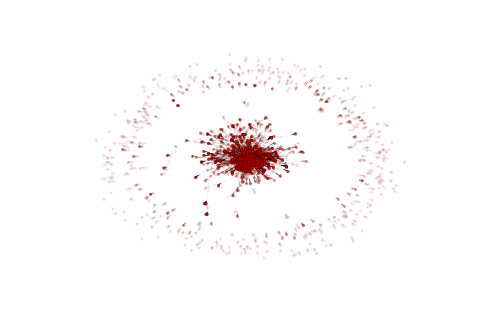

In [119]:
nx.draw(users_network, pos=nx.spring_layout(users_network),node_size=4, width=0.5, alpha=0.1)